In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns


#### 1.

In [97]:
df = pd.read_csv('housing.txt', sep=',', header=None)
df=df.dropna()

In [98]:
df

,0,1,2,3,4,5,6,7,8,9
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20433 non-null  float64
 1   1       20433 non-null  float64
 2   2       20433 non-null  float64
 3   3       20433 non-null  float64
 4   4       20433 non-null  float64
 5   5       20433 non-null  float64
 6   6       20433 non-null  float64
 7   7       20433 non-null  float64
 8   8       20433 non-null  float64
 9   9       20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### 4.

In [100]:
y = df[9]
X = df.drop([9], axis=1).astype('float32')

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20433 non-null  float32
 1   1       20433 non-null  float32
 2   2       20433 non-null  float32
 3   3       20433 non-null  float32
 4   4       20433 non-null  float32
 5   5       20433 non-null  float32
 6   6       20433 non-null  float32
 7   7       20433 non-null  float32
 8   8       20433 non-null  float32
dtypes: float32(9)
memory usage: 878.0 KB


In [102]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

#### 2.

In [103]:
la = LabelEncoder()
y = la.fit_transform(y.values)

In [104]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [105]:
y_new_arr = np.zeros((len(y), 5))
for i, value in enumerate(y):
    y_new_arr[i][value]=1.0
y=y_new_arr

#### 3.

In [106]:
X_train, X_val_tmp, y_train, y_val_tmp = train_test_split(X, y, test_size = 0.2, random_state = 20)
X_val, X_test, y_val, y_test = train_test_split(X_val_tmp, y_val_tmp, test_size = 0.5, random_state = 20)

#### 5., 6.

In [119]:
from keras.layers import LeakyReLU
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def model_train(num_inputs=9, lr=0.0001):
    model = Sequential()
    model.add(Dense(1024, input_dim=num_inputs))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5,activation='softmax'))
    
    opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics="acc")
    return model


#### 7.

In [120]:
model = model_train(9, 0.0001)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val), batch_size=512)

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 1.4308 - acc: 0.4868 - val_loss: 1.2197 - val_acc: 0.5678
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 1.1248 - acc: 0.6071 - val_loss: 0.9612 - val_acc: 0.6422
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.9446 - acc: 0.6667 - val_loss: 0.8254 - val_acc: 0.7093
Epoch 4/100
32/32 [==============================] - 2s 53ms/step - loss: 0.8521 - acc: 0.6931 - val_loss: 0.7656 - val_acc: 0.7176
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.8063 - acc: 0.7036 - val_loss: 0.7328 - val_acc: 0.7259
Epoch 6/100
32/32 [==============================] - 2s 57ms/step - loss: 0.7748 - acc: 0.7180 - val_loss: 0.7086 - val_acc: 0.7347
Epoch 7/100
32/32 [==============================] - 2s 56ms/step - loss: 0.7524 - acc: 0.7186 - val_loss: 0.6922 - val_acc: 0.7367
Epoch 8/100
32/32 [==============================] - 2s 53ms/step - loss: 0.

32/32 [==============================] - ETA: 0s - loss: 0.3228 - acc: 0.872 - 1s 37ms/step - loss: 0.3228 - acc: 0.8723 - val_loss: 0.3367 - val_acc: 0.8581
Epoch 63/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3318 - acc: 0.8678 - val_loss: 0.2912 - val_acc: 0.8801
Epoch 64/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3172 - acc: 0.8746 - val_loss: 0.3268 - val_acc: 0.8722
Epoch 65/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3270 - acc: 0.8698 - val_loss: 0.2922 - val_acc: 0.8742
Epoch 66/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3207 - acc: 0.8715 - val_loss: 0.3023 - val_acc: 0.8722
Epoch 67/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3255 - acc: 0.8702 - val_loss: 0.3491 - val_acc: 0.8556
Epoch 68/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3191 - acc: 0.8693 - val_loss: 0.2774 - val_acc: 0.8801
Epoch 69/100
32/32 [========================

#### 8.

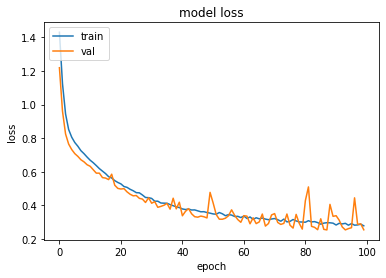

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

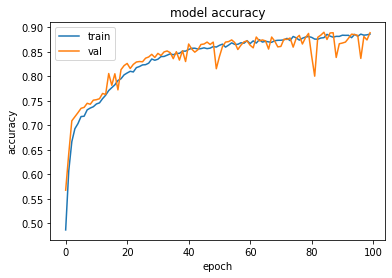

In [122]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()